# Effects of different Variables on Borrower APR

In [10]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb 
%matplotlib inline 

# Introduction 

In this porject I have deciced to choose the 'Loan Data from Prosper' optional topic to work with. In order to gain access to the data frame, I had to follow the link that immediately started to download the 'prosperLoanData' file for me. In there, I have chosen to analyse the information on the loans data like loan amount, interest rate, borrower rate, the status on the loan, different fees and many others. As the results, the loan data consists of 113,937 loans and 81 variables for each loan. Any information given regarding personal information can be useful. Such information cna be: occupation, the rating in Prosper, the loan status, income of the borrower and etc.

# Data Codes

The codes below sum up the most important commands given towards making the data shorter and more clean. Some of them would be repeated in order to make the plots be designed quicker and more efficient. The next steps after this code will take a closer look at the variables (chosen) to be demonstrated from the data and that have connection to the analysis of Borrower APR

In [11]:
loan_data = pd.read_csv('prosperLoanData.csv')
loan_data.shape
loan_data = loan_data[~loan_data.BorrowerAPR.isna()]
columns = ['LoanOriginalAmount', 'BorrowerAPR', 'StatedMonthlyIncome', 'Term', 'ProsperRating (Alpha)', 
        'EmploymentStatus']
loan_data_apr = loan_data[columns]
rate_order = ['AA','A','B','C','D','E','HR']
emp_order = ['Self-employed','Employed','Full-time','Part-time','Retired','Other','Not employed', 'Not available']
var1 = ['LoanOriginalAmount', 'BorrowerAPR', 'StatedMonthlyIncome']
var2 = ['Term', 'ProsperRating (Alpha)','EmploymentStatus']
loan_data_apr_sample = loan_data_apr.sample(1000)

# Borrower APR 

It seems that the Borrower APR is spread out. However, we can see key peek highlights at 0.1, 0.2 and 0.3 marks. It is also worth mentioning that the biggest peek happens around a 0.35-0.36 mark. Since the marks get extended to 0.5 it means that only a few loan have a higher Borrower APR than 4.2 (lets see how many loans exactly have an APR higher than 0.42)

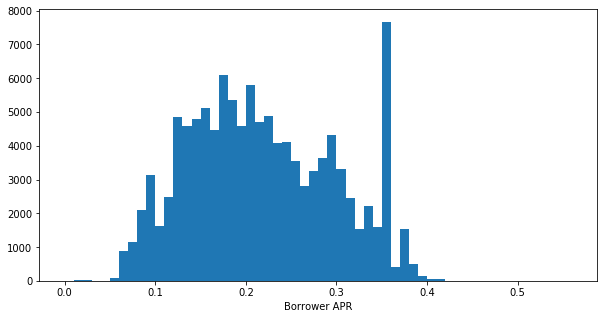

In [12]:
bins = np.arange(0, loan_data.BorrowerAPR.max()+0.05, 0.01)
plt.figure(figsize=[10, 5])
plt.hist(data = loan_data, x = 'BorrowerAPR', bins = bins);
plt.xlabel('Borrower APR');

# Original Loan Amount 

The very large spikes in frequency are at 10k, 15k, 20k, 25k and 35k. There are also small spikes at 8k,9k,11k,12k,13k,14k etc.

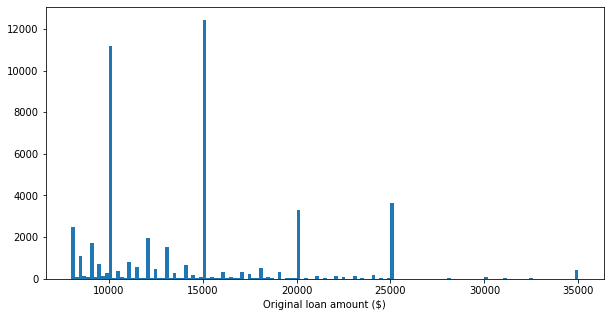

In [13]:
bins = np.arange(8000, loan_data_apr.LoanOriginalAmount.max()+200, 200)
plt.figure(figsize=[10, 5])
plt.hist(data = loan_data_apr, x = 'LoanOriginalAmount', bins = bins);
plt.xlabel('Original loan amount ($)');

# Stated Monthly Income

We can clearly see that it is a right screwed distribution. Most of the Income is below $10,000.

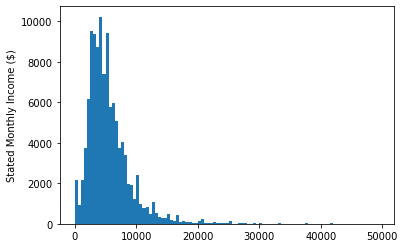

In [14]:
bins_smi = np.arange(0, 50000, 500)
plt.hist(data = loan_data_apr, x = 'StatedMonthlyIncome', bins=bins_smi);
plt.ylabel('Stated Monthly Income ($)');

# Borrower APR and Loan Original Amount 

At different size of the loan amount, the APR has a large range, but the range of APR decrease with the increase of loan amount.

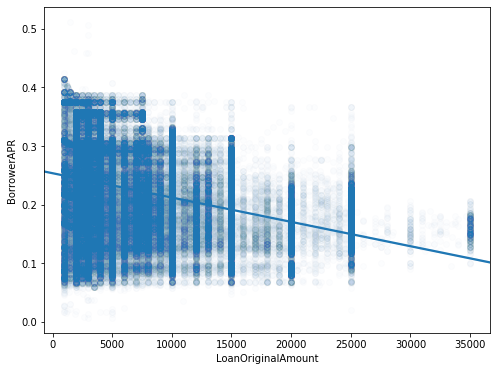

In [15]:
plt.figure(figsize = [8, 6])
sb.regplot(data = loan_data_apr, x = 'LoanOriginalAmount', y = 'BorrowerAPR', scatter_kws={'alpha':0.01});

# Effect of Prosper Rating on Borrower APR and Term Relationship 

Loan Original Amount seems to be improving with a better Prosper Rating, but Borrower APR however get worse with a better Prosper Rating. We can also see that once the rating becomes A or AA, then the relation between APR and Loan Amount turns into a positive correlation. 

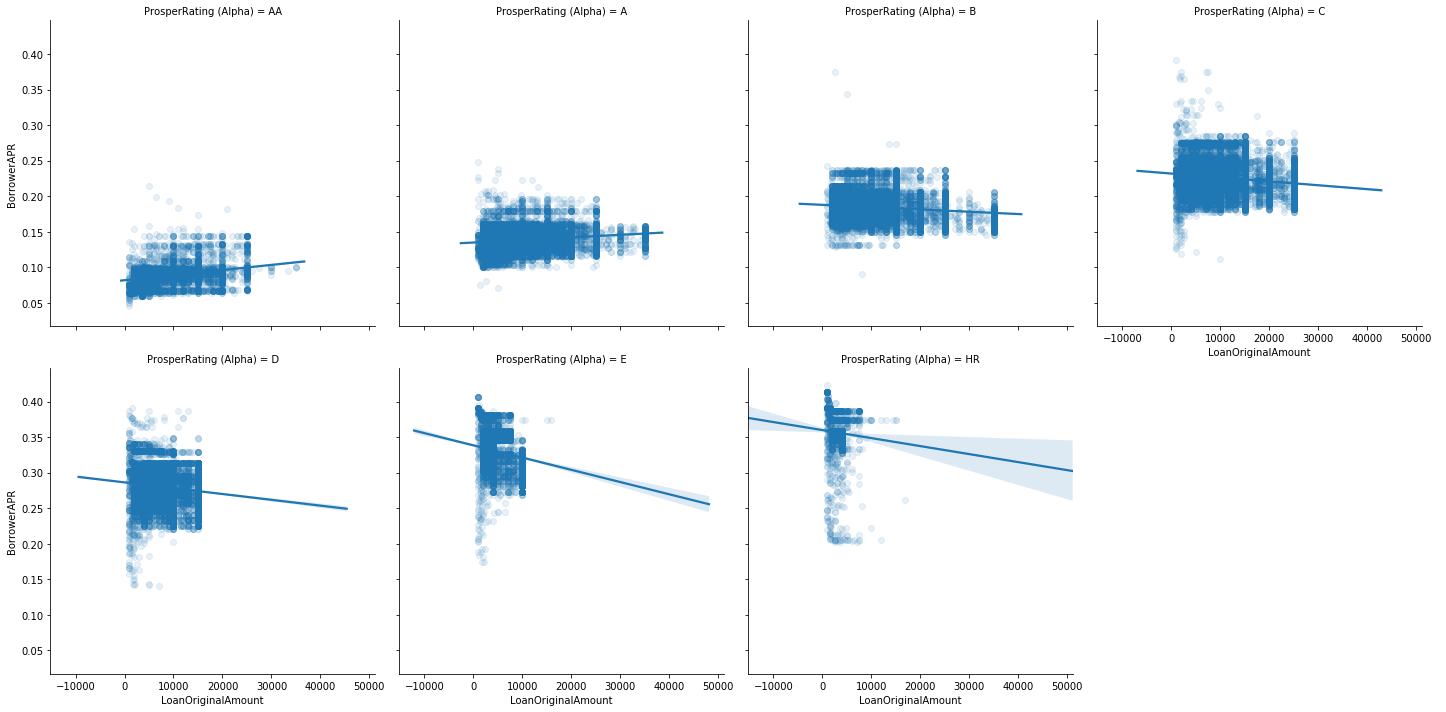

In [16]:
rating = sb.FacetGrid(data = loan_data_apr, col = 'ProsperRating (Alpha)', height = 5, aspect = 1, col_wrap = 4, col_order = ['AA','A','B','C','D','E','HR'])
rating.map(sb.regplot,'LoanOriginalAmount', 'BorrowerAPR', x_jitter = 0.3, scatter_kws={'alpha':0.1});
rating.add_legend();

Because the relationship goes from negative to positive it would be intereting to see on a better graph the difference. Thats why in the next plot I will try to further observe the change in Borrowers APR all depending on the Term and Prosper Rating (Alpha). Thus, it will be seen that Borrower APR inscrease as well as the borrow Term as the Ratings becomes AA and A. However as the Rating goes down to B up to HR, so does the borrow Term and borrowers APR.

Text(0, 0.5, 'Mean Borrower APR')

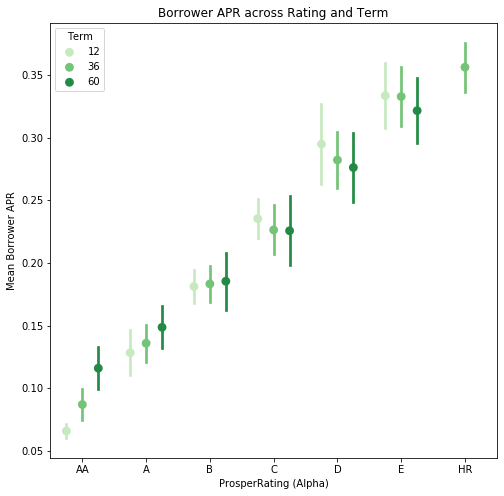

In [17]:
plt.figure(figsize = [8,8])
point = sb.pointplot(data=loan_data_apr,  x = 'ProsperRating (Alpha)', y = 'BorrowerAPR', hue = 'Term',
                    palette = 'Greens', linestyles = '', dodge=0.5, ci = 'sd', order = rate_order)
plt.title('Borrower APR across Rating and Term')
plt.ylabel('Mean Borrower APR')